In [16]:
abstract type Solver end
struct Euler 		<: Solver end #Euler è tipo derivato di Solver
struct EulerCromer 	<: Solver end
struct MidPoint 	<: Solver end
struct LeapFrog 	<: Solver end

In [17]:
include("solver.jl")
using PyPlot
x0 = 20.0;
v0 = 10.0;
k=0.3; m=1;
ω0 = sqrt(k/m);
tlim = [0.0 ,50.0];
Δt = 0.001;
f(x) = -ω0^2 * x;

In [18]:
A = sqrt(((ω0*x0)^2+v0^2)/ω0^2);
δ = -atan(v0/(x0*ω0));
xsol(t) = A*cos(ω0*t + δ);
vsol(t) = -A*ω0* sin(ω0*t+δ); # derivative of xsol(t)
Δt

0.001

In [19]:
euler=solve(Euler,f,x0,v0,tlim,Δt)
crom=solve(EulerCromer,f,x0,v0,tlim,Δt);
mid=solve(MidPoint,f,x0,v0,tlim,Δt);
leap=solve(LeapFrog,f,x0,v0,tlim,Δt);

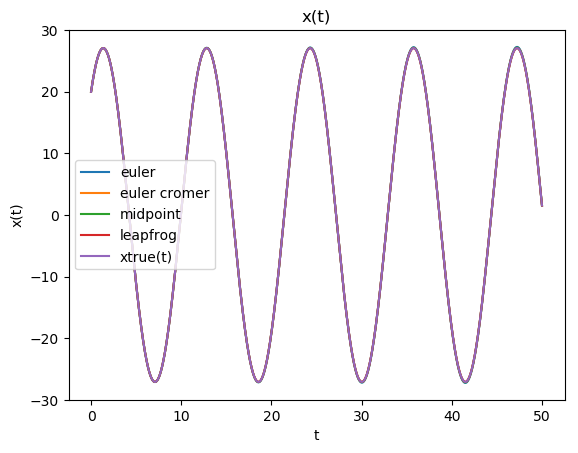

PyObject Text(0.5, 1.0, 'x(t)')

In [20]:
plot(euler.t , euler.x );
plot(crom.t , crom.x );
plot(mid.t , mid.x );
plot(leap.t , leap.x );

plot(euler.t , xsol.(euler.t) )

legend(["euler","euler cromer","midpoint","leapfrog","xtrue(t)"]);
xlabel("t");
ylabel("x(t)")
title("x(t)")

ENERGIE

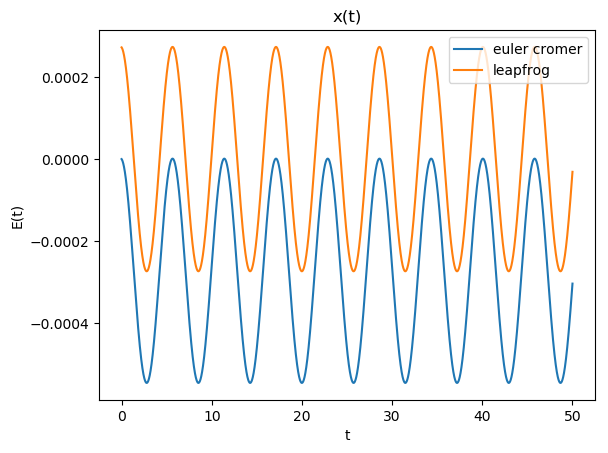

PyObject Text(0.5, 1.0, 'x(t)')

In [21]:
E0=0.5*k*x0^2 + 0.5*m*v0^2

E_eu=(0.5*k*euler.x.^2 + 0.5*m*euler.v.^2 .- E0)/E0
E_cr=(0.5*k*crom.x.^2 + 0.5*m*crom.v.^2 .- E0)/E0
E_mi=(0.5*k*mid.x.^2 + 0.5*m*mid.v.^2 .- E0)/E0
E_le=(0.5*k*leap.x.^2 + 0.5*m*leap.v.^2 .- E0)/E0

#plot(euler.t,E_eu);
plot(crom.t ,E_cr);
#plot( mid.t,E_mi );
plot(leap.t,E_le );

legend(["euler cromer","leapfrog"]);
xlabel("t");
ylabel("E(t)")
title("x(t)")

ENERGY VS \Deltat

In [27]:
Δtt=0.001
E_euler=[]
E_cromer=[]
E_mid=[]
E_leap=[]

Δt_values=[]
while Δtt < 0.6
    
    Δtt*=1.2
    euler=solve(Euler,f,x0,v0,tlim,Δtt)
    crom=solve(EulerCromer,f,x0,v0,tlim,Δtt);
    mid=solve(MidPoint,f,x0,v0,tlim,Δtt);
    leap=solve(LeapFrog,f,x0,v0,tlim,Δtt);
    
    append!(Δt_values,Δtt)
    append!(E_euler, (0.5*k*euler.x[end]^2 + 0.5*m*euler.v[end]^2 - E0)/E0)
    append!(E_cromer, (0.5*k*crom.x[end]^2 + 0.5*m*crom.v[end]^2 - E0)/E0)
    append!(E_mid, (0.5*k*mid.x[end]^2 + 0.5*m*mid.v[end]^2 - E0)/E0)
    append!(E_leap, (0.5*k*leap.x[end]^2 + 0.5*m*leap.v[end]^2 - E0)/E0)
end


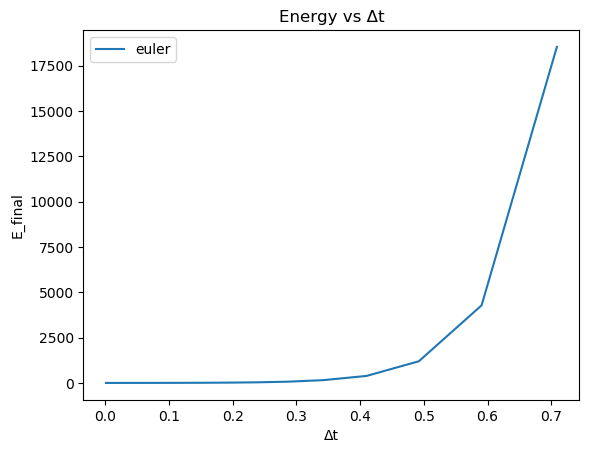

PyObject Text(0.5, 1.0, 'Energy vs Δt')

In [28]:
plot(Δt_values,E_euler)
#plot(Δt_values,E_cromer)
#plot(Δt_values,E_mid)
#plot(Δt_values,E_leap)

legend(["euler","euler cromer","midpoint","leapfrog","xtrue(t)"]);
xlabel("Δt");
ylabel("E_final")
title("Energy vs Δt")

In [29]:
#INVERSIONE TEMPORALE

x0_inv=leap.x[end]; v0_inv=-leap.v[end];
leap_inv=solve(LeapFrog,f,x0_inv,v0_inv,tlim,Δt);

println("leap direct ",leap.x[1]," ",leap.x[end])
println("leap inverse ",leap_inv.x[1]," ",leap_inv.x[end])

leap direct 25.580818455903767 -7.739367159478345
leap inverse 7.173900878083665 16.580984274795576


In [25]:
zio=solve(Solver,f,x0,v0,tlim,Δt);

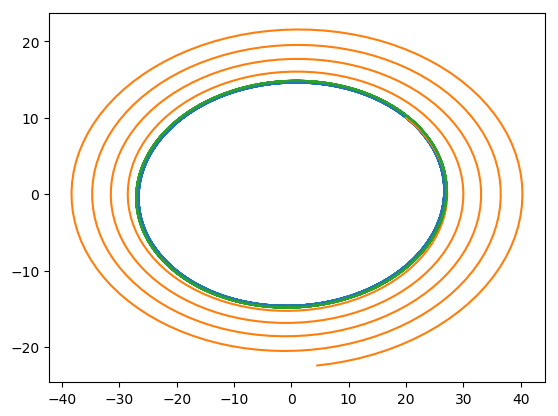

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f688d966350>

In [26]:
#SPAZIO FASI

#plot(euler.x,euler.v)
plot(crom.x,crom.v)
plot(mid.x,mid.v)
plot(leap.x,leap.v)
